In [1]:
using LinearAlgebra
using Plots
using IJulia
gr() # Plots.GRBackend()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


Plots.GRBackend()

In [2]:
function getLineDist(x)
    ll = [1, 0, -2]
    l = ll[1:2]
    abs(l'*x + ll[3])/norm(l)
end

function getCircDist(x)
    ll = [6,6,5]
    l = ll[1:2]
    d = abs(norm(x-l) - ll[3])
end

function getLineDist3d(x)
    ll = [1, 0, 0, -2]
    l = ll[1:3]
    abs(l'*x + ll[4])/norm(l)
end

function getCircDist3d(x)
    ll = [10, 0, 0, 9]
    l = ll[1:3]
    d = abs(norm(x-l) - ll[4])
end

getCircDist3d (generic function with 1 method)

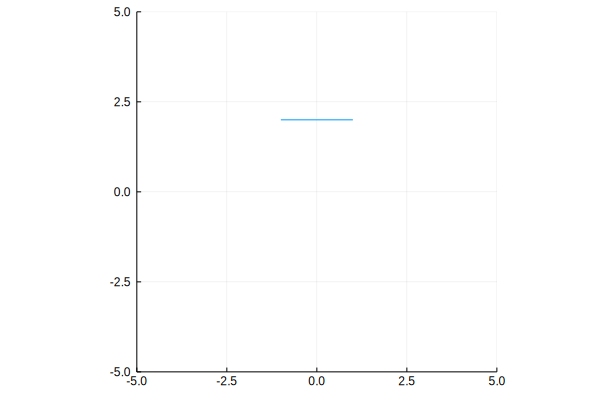

In [3]:
function expl(r)
    -r[1]/r[2], -r[3]/r[2]
end
line =[0 1 -2]
m,q=expl(line)
x=range(-1, stop=1, length=100)
y =m.*x.+q
plot(x,y)
plot!(lims = (-5, 5), aspect_ratio=:equal, legend = false)

In [4]:
getLineDist([1, 1.5])

1.0

In [5]:
getCircDist([0, 0])

3.4852813742385695

In [6]:
function plotC(x,y,d)
    t = -π:2π/200:π
    _x = x .+ d.*cos.(t);
    _y = y .+ d.*sin.(t);
    plot!(_x, _y, aspect_ratio=:equal)
end

plotC (generic function with 1 method)

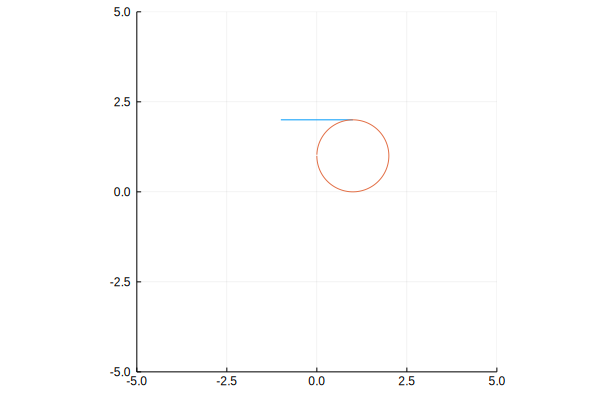

In [7]:
plotC(1,1,1)

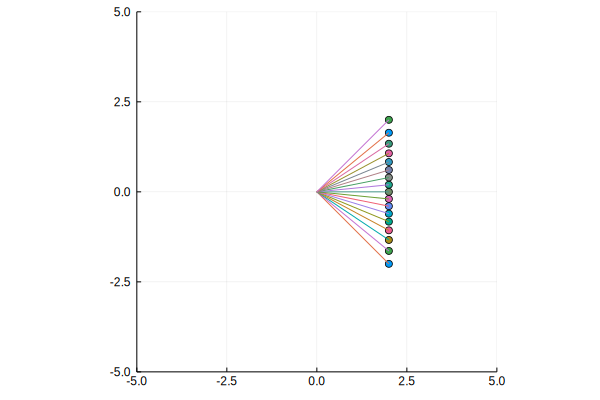

In [8]:
plot()
for φ = -π/4:2π/64:π/4
    dir = [cos(φ), sin(φ)]
    #println(dir)
    p = zeros(2)
    for i = 1:50
        d = getLineDist(p);
        #println(dd)
        p += d*dir
        #println(p)
    end
    scatter!([p[1]],[p[2]])
    plot!([0,p[1]],[0,p[2]])
    # plot!([0,dir[1]],[0,dir[2]])
end

plot!(lims = (-5, 5), aspect_ratio=:equal, legend = false)

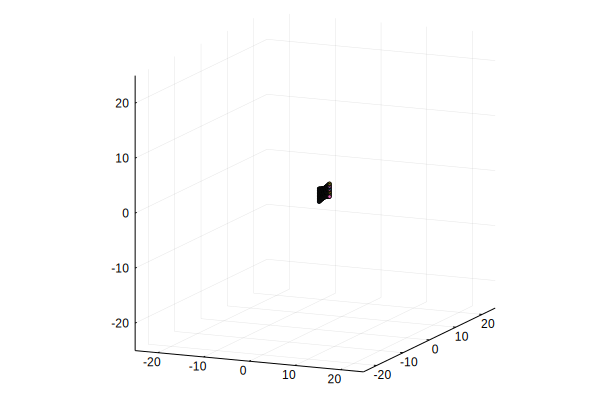

In [9]:
using GeometryTypes
using CoordinateTransformations
plot()
verts = Point3f0[]
for θ = π*3/8:2π/64:π*5/8
    for φ = -π/4:2π/256:π/4
        dir = [
            sin(θ)cos(φ),
            sin(θ)sin(φ),
            cos(θ)]
        #println(dir)
        p = zeros(3)
        for i = 1:50
            d = getLineDist3d(p);
            p += d*dir
        end
        scatter!([p[1]], [p[2]], [p[3]], m=2)
        # plot!([0, p[1]], [0, p[2]], [0, p[3]])
        # plot!([0,dir[1]],[0,dir[2]])
        append!(verts, [Point3f0(p[1], p[2], p[3])])
    end
end
plot!(lims = (-25, 25), aspect_ratio=:equal, legend = false)

In [10]:
using MeshCat
vis = Visualizer()
open(vis)
# IJuliaCell(vis)

┌ Info: Precompiling MeshCat [283c5d60-a78f-5afe-a0af-af636b173e11]
└ @ Base loading.jl:1273
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://localhost:8700
└ @ MeshCat C:\Users\aless\.julia\packages\MeshCat\nXUuG\src\visualizer.jl:69


Process(`cmd.exe /C 'start http://localhost:8700'`, ProcessExited(0))

In [11]:
setobject!(vis, PointCloud(verts))

MeshCat Visualizer with path /meshcat at http://localhost:8700

In [29]:
using GeometryTypes
using CoordinateTransformations

setobject!(vis, HyperRectangle(Vec(0., 0, 0), Vec(1., 1, 1)))
settransform!(vis, Translation(-0.5, -0.5, 0))

MeshCat Visualizer with path /meshcat

In [30]:
using ColorTypes
verts = rand(Point3f0, 100000)
setobject!(vis, PointCloud(verts))

MeshCat Visualizer with path /meshcat

In [31]:
verts 

100000-element Array{Point{3,Float32},1}:
 [0.14231908, 0.12917018, 0.8354864]  
 [0.11986828, 0.30279958, 0.9245515]  
 [0.37529373, 0.3586656, 0.009718776] 
 [0.6370411, 0.05788815, 0.9297514]   
 [0.5048274, 0.21338141, 0.44982064]  
 [0.906744, 0.21526647, 0.004015565]  
 [0.82474685, 0.4052359, 0.60900795]  
 [0.93125093, 0.6636852, 0.68159163]  
 [0.15586233, 0.3736937, 0.07904208]  
 [0.47796, 0.9978777, 0.11018646]     
 [0.65373826, 0.8239914, 0.2101481]   
 [0.2752571, 0.23788321, 0.98914886]  
 [0.7627559, 0.5526229, 0.8825189]    
 ⋮                                    
 [0.23089099, 0.7094513, 0.9972122]   
 [0.46479285, 0.6639061, 0.427837]    
 [0.17114997, 0.009053588, 0.32166374]
 [0.09376907, 0.00656569, 0.83172035] 
 [0.22119534, 0.16561615, 0.7383021]  
 [0.34350324, 0.1731441, 0.12577105]  
 [0.27016938, 0.9749806, 0.78518665]  
 [0.6612884, 0.22987759, 0.07152033]  
 [0.8183445, 0.8046862, 0.030056596]  
 [0.55975723, 0.43145788, 0.50694656] 
 [0.5566603, 0.4729465

Error handling websocket connection:
TaskFailedException:
WebSockets.WebSocketClosedError("ws|server respond to OPCODE_CLOSE 1001:Going Away")
Stacktrace:
 [1] handle_control_frame(::WebSockets.WebSocket{Sockets.TCPSocket}, ::WebSockets.WebSocketFragment) at C:\Users\aless\.julia\packages\WebSockets\pc4iW\src\WebSockets.jl:376
 [2] read(::WebSockets.WebSocket{Sockets.TCPSocket}) at C:\Users\aless\.julia\packages\WebSockets\pc4iW\src\WebSockets.jl:452
 [3] macro expansion at C:\Users\aless\.julia\packages\WebIO\Rk8wc\src\providers\mux.jl:38 [inlined]
 [4] (::WebIO.var"#97#98"{WebSockets.WebSocket{Sockets.TCPSocket},WebIO.WebSockConnection})() at .\task.jl:333
Stacktrace:
 [1] wait at .\task.jl:251 [inlined]
 [2] create_socket(::Dict{Any,Any}) at C:\Users\aless\.julia\packages\WebIO\Rk8wc\src\providers\mux.jl:44
 [3] (::Mux.var"#5#6"{Mux.var"#28#29"{Array{SubString{String},1}},typeof(WebIO.create_socket)})(::Function, ::Dict{Any,Any}) at C:\Users\aless\.julia\packages\Mux\FeATY\src\Mux.j

In [15]:
Point3f0(1,1,1)

UndefVarError: UndefVarError: Point3f0 not defined

In [16]:
TL = (-2f0 * pi):(2f0 * pi)
verts = Point3f0[]
for i=1:10
    append!(verts, [Point3f0(i, i, i)])
end

UndefVarError: UndefVarError: Point3f0 not defined

In [17]:
setobject!(vis, PointCloud(verts))

UndefVarError: UndefVarError: PointCloud not defined

In [18]:
verts

UndefVarError: UndefVarError: verts not defined

In [93]:
x = zeros(0)

0-element Array{Float64,1}